# Analysis of Date feature
The analysis of the date feature is useful to understand possible encoding using dummy variables, it is important to undertand the trends of sales in different days of the week or different periods of the month/year to better decide what to include and what feature is important to have in the regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('./dataset/preprocessed_train.csv')

### Defining functions in order to plot easier

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

def convert_to_date(sample):
    sample['Date'] = pd.to_datetime(sample['Date'],format='%d/%m/%Y')
    
def get_store_data(store_id):
    return dataset.loc[dataset['StoreID'] == store_id]
    

In [3]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%m')
yearsFmt = mdates.DateFormatter('%Y')
monthsYearFmt = mdates.DateFormatter('%m-%Y')

#function that plots a store sale trend
def plot_storeNo(store_id):
    sampleStore = get_store_data(store_id)
    convert_to_date(sampleStore)
    
    
    
    fig, ax = plt.subplots()
    
    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    
    ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()
    
#function that plots many store sales trends in the whole amount of time with legend
def plot_stores(start_index,end_index):  
    fig, ax = plt.subplots()

    # format the ticks
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    
    stores_legend = []

    for i in range(start_index,end_index):
        sampleStore = get_store_data(i)
        convert_to_date(sampleStore)
    
        ax.plot(sampleStore.Date, sampleStore.NumberOfSales)
        stores_legend.append('Store '+str(i))
        
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(monthsYearFmt)
    ax.xaxis.set_minor_locator(months)
    plt.legend(stores_legend, loc='upper left')

    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()    

In [4]:
sampleStore = dataset.loc[dataset['StoreID'] == 1000]

In [5]:
s = sampleStore[:4]
s

,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,...,Events_Hail,Events_Rain,Events_Snow,Events_Thunderstorm,MeanStoreSales,MeanRegionSales,MeanCustomers,MeanRegionCustomers,D_DayOfWeek_cos,D_DayOfWeek_sin
0,1000,01/03/2016,0,0,Hyper Market,General,326,7,495,5676,...,0,1,1,0,7675.446488,4702.749381,622.769231,284.209173,0.623490,0.781831
1,1000,02/03/2016,0,0,Hyper Market,General,326,7,608,8111,...,0,0,1,0,7675.446488,4702.749381,622.769231,284.209173,-0.222521,0.974928
2,1000,04/03/2016,0,0,Hyper Market,General,326,7,665,8300,...,0,1,0,0,7675.446488,4702.749381,622.769231,284.209173,-0.900969,-0.433884
3,1000,05/03/2016,0,0,Hyper Market,General,326,7,630,7154,...,0,0,0,0,7675.446488,4702.749381,622.769231,284.209173,-0.222521,-0.974928


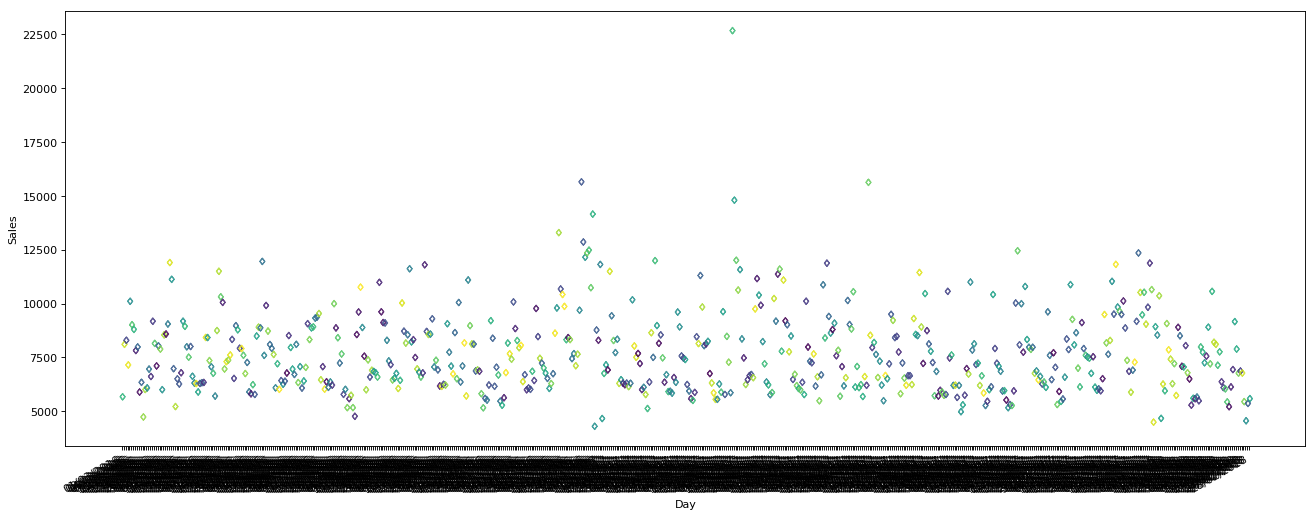

In [6]:
import datetime
import random
plt.rcParams['figure.figsize'] = [20.0,8.0]
plt.rcParams['figure.dpi']=80

#x = sampleStore['Date'][:100]
#y = sampleStore['NumberOfSales'][:100]
x = sampleStore['Date']
y = sampleStore['NumberOfSales']

plt.xlabel("Day")
plt.ylabel("Sales")

colors = np.random.rand(*x.shape)
# plot
plt.scatter(x, y, c=colors, marker=r'$\diamondsuit$', alpha=0.8)
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

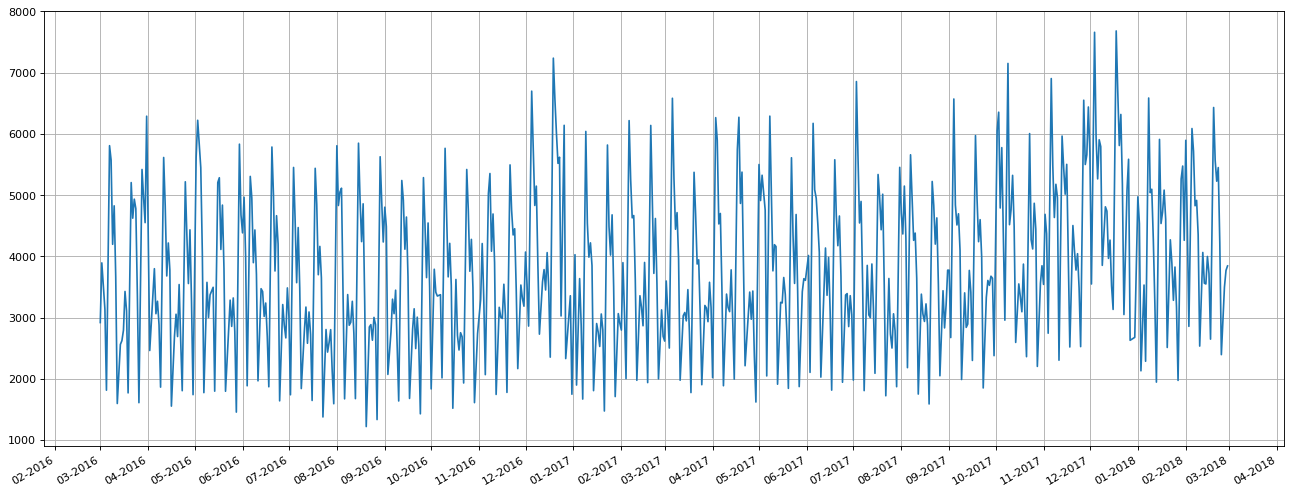

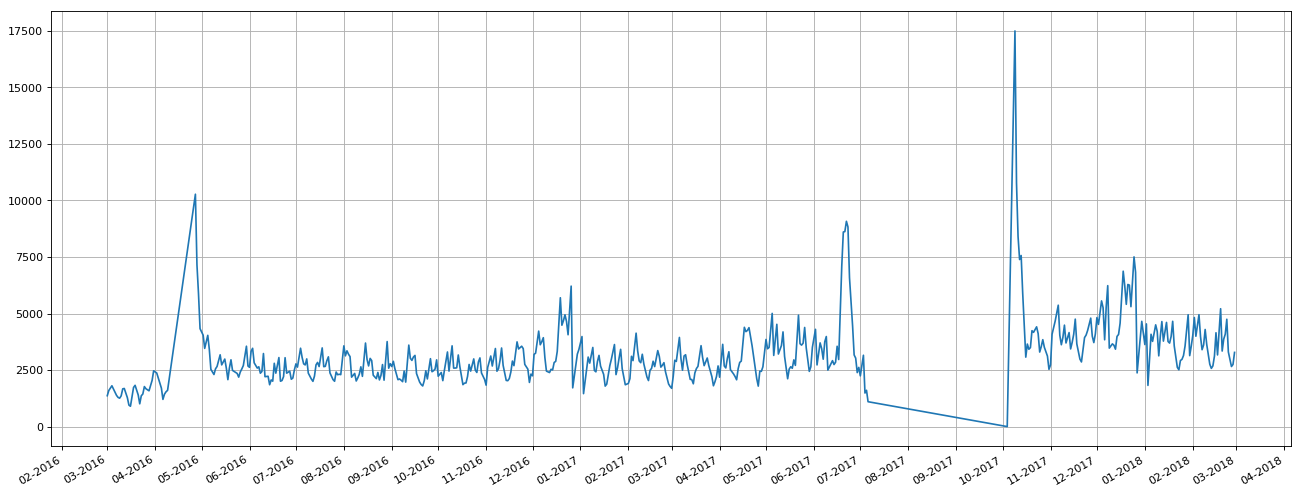

In [7]:
plot_storeNo(1023)
plot_storeNo(1001)

Initial patterns I'm noticing: 
* Decreasing sales through the month
* Peak at the start of the month (probably due to monthly paycheck)
* Second and more subtle peak in the middle of the month (why?)
* Need to drop 0-sells days


Next: to an average of all the stores, look at days of week, it is possible that the sales are not related to the weekend since sometimes there are 3 peaks a month 

## Let's try to drop all examples with 0 sales

Only a few stores are open with 0 sales, those examples can be overlooked

In [9]:
dataset[(dataset.NumberOfSales == 0)].index

Int64Index([   990,  15101,  22181,  27280,  27281,  28692,  76344,  85383,
            141927, 189709, 189710, 213654, 213655, 221153, 221154, 247648,
            248974, 248975, 248976, 288326, 308537, 319161, 319162, 324330,
            324331, 327502, 343726, 343727, 356888, 423276, 423277, 428249],
           dtype='int64')

Looking in an open store with 0 sales

In [10]:
dataset.iloc[1310]

StoreID                                1002
Date                             29/10/2016
IsHoliday                                 0
HasPromotions                             0
StoreType                      Hyper Market
AssortmentType                      General
NearestCompetitor                       370
Region                                    3
NumberOfCustomers                       357
NumberOfSales                          4089
Region_AreaKM2                          407
Region_GDP                            13155
Region_PopulationK                     1584
CloudCover                                7
Events                                 Rain
Max_Dew_PointC                           16
Max_Humidity                             94
Max_Sea_Level_PressurehPa              1013
Max_TemperatureC                         19
Max_VisibilityKm                       1699
Max_Wind_SpeedKm_h                       19
Mean_Dew_PointC                          13
Mean_Humidity                   

In [11]:
print("Dropping 0-sales")
dataset = dataset.drop(dataset[dataset.NumberOfSales == 0].index)

Dropping 0-sales


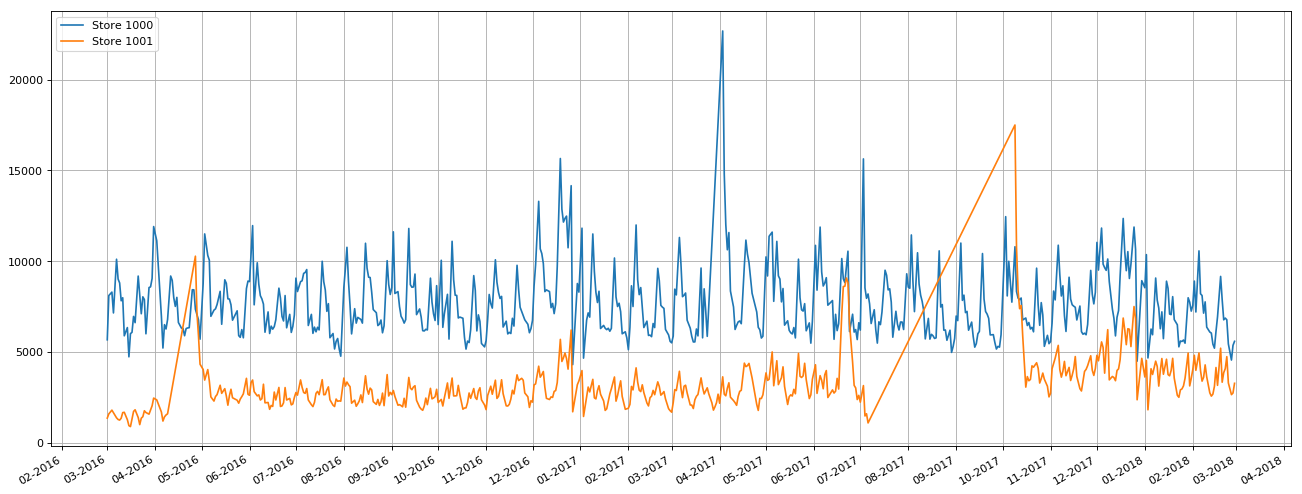

In [12]:
store_id=1000
sampleStore = get_store_data(store_id)
convert_to_date(sampleStore)

    
fig, ax = plt.subplots()
    
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
    
ax.plot(sampleStore.Date, sampleStore.NumberOfSales)

store_id=1001
sampleStore = get_store_data(store_id)
convert_to_date(sampleStore)
    
ax.plot(sampleStore.Date, sampleStore.NumberOfSales)


ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
plt.legend(['Store 1000', 'Store 1001'], loc='upper left')

ax.grid(True)
fig.autofmt_xdate()
plt.show()

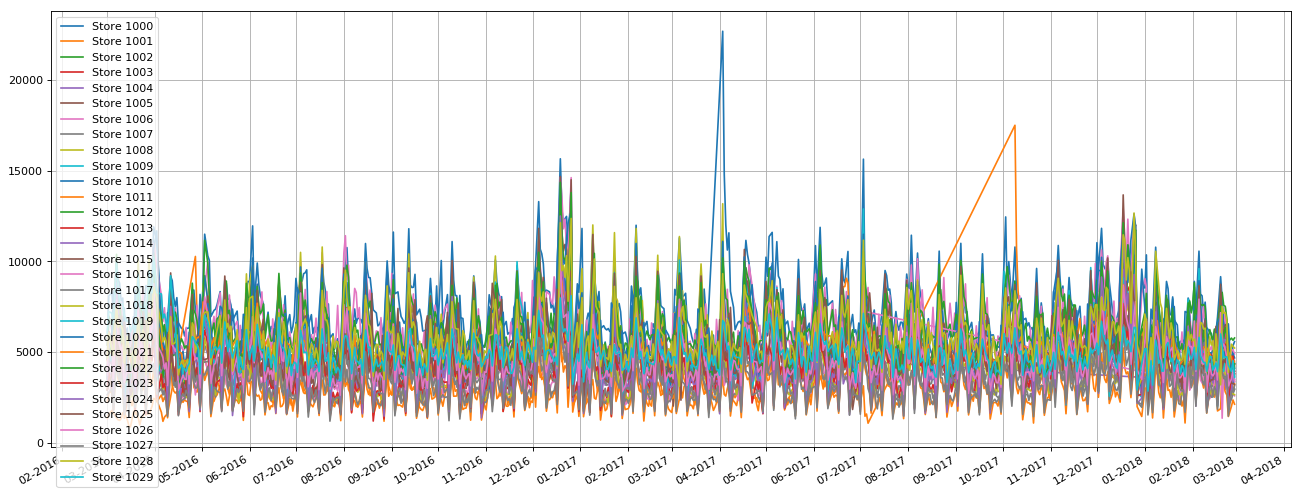

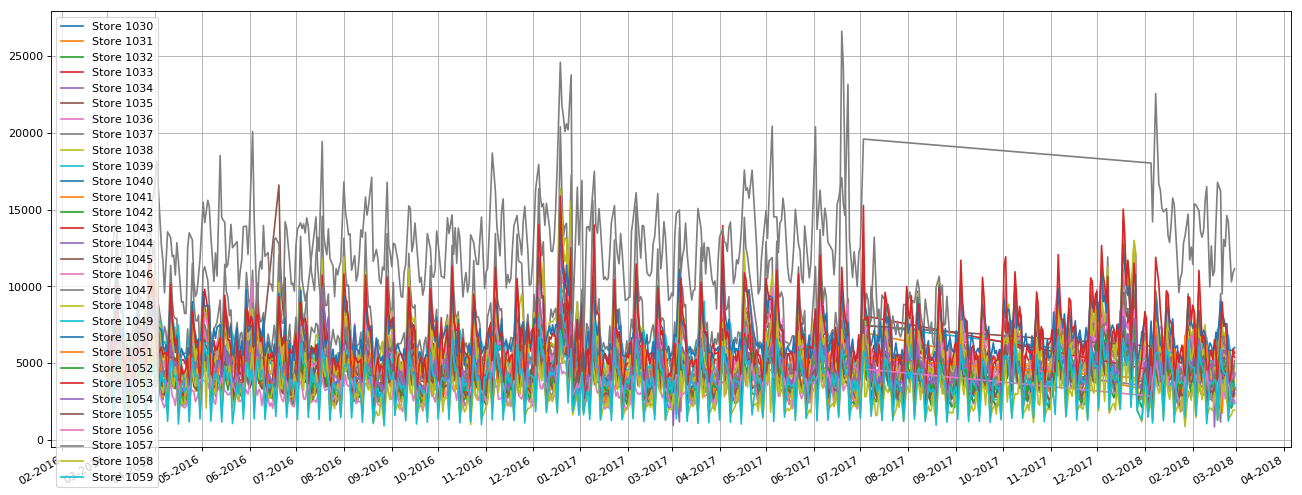

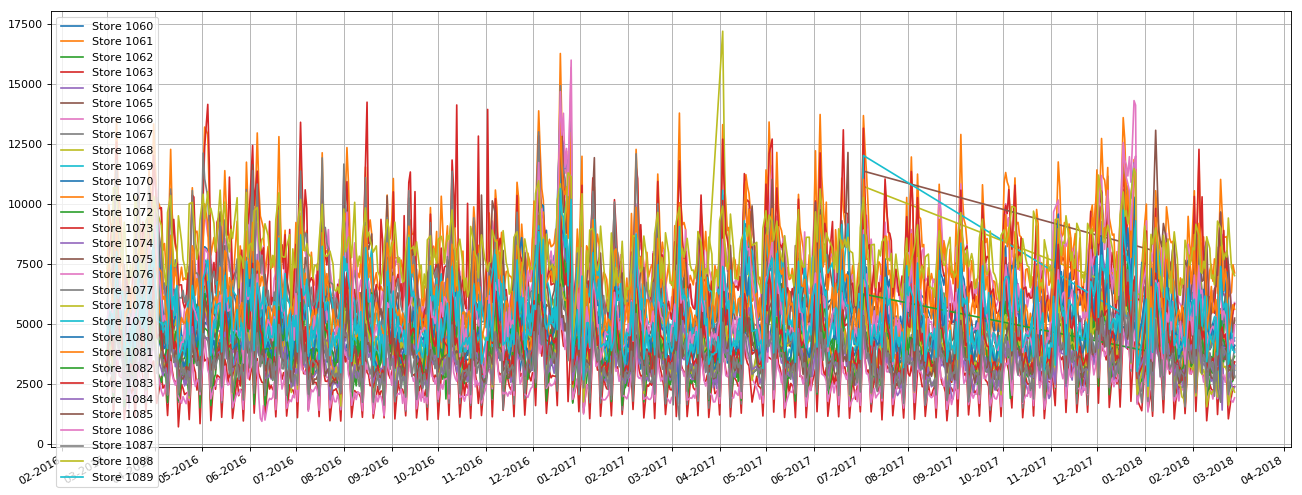

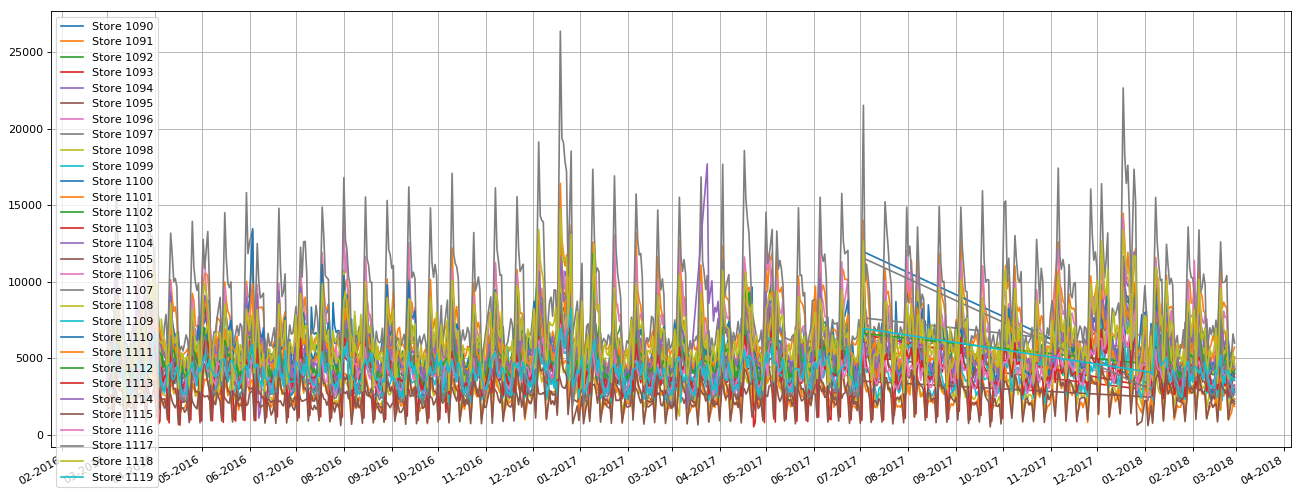

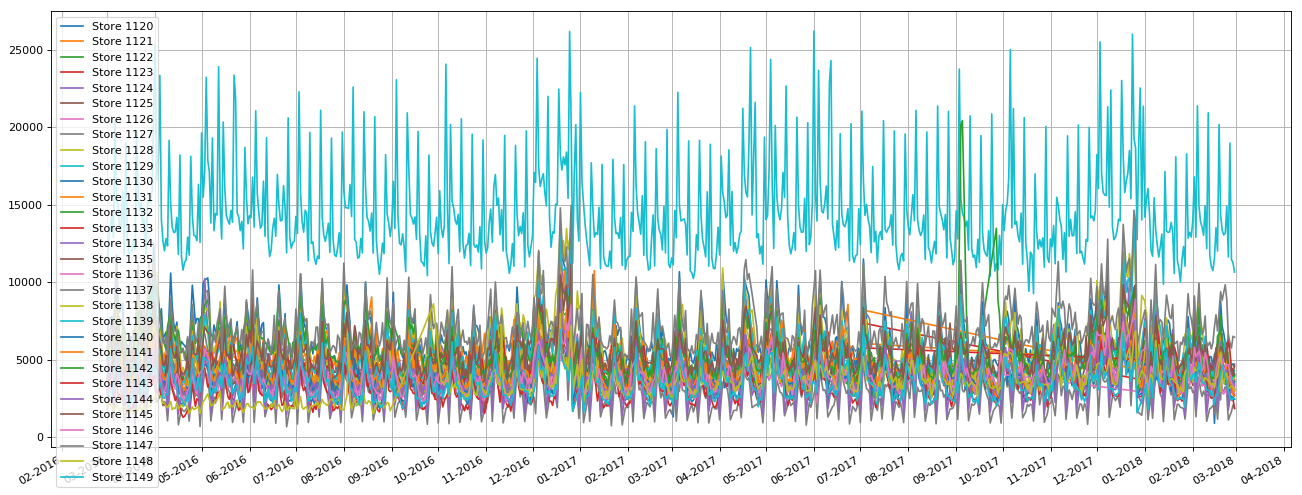

In [13]:
#random sampling
for i in range(5):
    plot_stores(1000+30*i,1030+30*i)

### Considerations
* The trends are aligned, this is a good thing, it means a unique model could approximate in a good way the behavior of all stores
* Another possibility would be to normalize the sales wrt to the mean, and after the prediction multiply by the mean
* Some stores are bigger than others, it is important to take that into consideration, for instance we could add a feature representing the average number of customers or average number of sales or the deviation

# Day of week feature extraction

### First of all let's convert to a valid date the Date feat

In [14]:
dataset.head(2)

,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,...,Events_Hail,Events_Rain,Events_Snow,Events_Thunderstorm,MeanStoreSales,MeanRegionSales,MeanCustomers,MeanRegionCustomers,D_DayOfWeek_cos,D_DayOfWeek_sin
0,1000,01/03/2016,0,0,Hyper Market,General,326,7,495,5676,...,0,1,1,0,7675.446488,4702.749381,622.769231,284.209173,0.623490,0.781831
1,1000,02/03/2016,0,0,Hyper Market,General,326,7,608,8111,...,0,0,1,0,7675.446488,4702.749381,622.769231,284.209173,-0.222521,0.974928


In [15]:
dataset['Date'] = pd.to_datetime(dataset['Date'],format='%d/%m/%Y')
dataset.head(2)

,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,...,Events_Hail,Events_Rain,Events_Snow,Events_Thunderstorm,MeanStoreSales,MeanRegionSales,MeanCustomers,MeanRegionCustomers,D_DayOfWeek_cos,D_DayOfWeek_sin
0,1000,2016-03-01,0,0,Hyper Market,General,326,7,495,5676,...,0,1,1,0,7675.446488,4702.749381,622.769231,284.209173,0.623490,0.781831
1,1000,2016-03-02,0,0,Hyper Market,General,326,7,608,8111,...,0,0,1,0,7675.446488,4702.749381,622.769231,284.209173,-0.222521,0.974928


### Creating new feature day_of_week

In [16]:
dataset['day_of_week'] = dataset['Date'].dt.weekday_name
dataset.rename(columns={'day_of_week': 'Day_of_week'}, inplace=True)

In [17]:
dataset.loc[:10,['Date','Day_of_week']]

,Date,Day_of_week
0,2016-03-01,Tuesday
1,2016-03-02,Wednesday
2,2016-03-04,Friday
3,2016-03-05,Saturday
4,2016-03-07,Monday
5,2016-03-08,Tuesday
6,2016-03-09,Wednesday
7,2016-03-10,Thursday
8,2016-03-11,Friday
9,2016-03-12,Saturday


# Day of week OHE
Let's now create a new feature for every day of the week (OHE).
We should decide whether to drop one column (es. the less influent) to avoid Dummy variable trap in regression, see:
[Dummy variables trap](http://www.algosome.com/articles/dummy-variable-trap-regression.html "Dummy variables trap")



In [18]:
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dataset = pd.concat([dataset,pd.get_dummies(dataset['Day_of_week'], prefix='Is')],axis=1)

In [19]:
dataset.iloc[:10,35:]

,D_DayOfYear,D_Month,D_Year,D_DayOfweek,StoreType_SuperMarket,StoreType_HyperMarket,StoreType_StandardMarket,StoreType_ShoppingCenter,AssortmentType_General,AssortmentType_WithNFDept,...,D_DayOfWeek_cos,D_DayOfWeek_sin,Day_of_week,Is_Friday,Is_Monday,Is_Saturday,Is_Sunday,Is_Thursday,Is_Tuesday,Is_Wednesday
0,61,3,2016,1,0,1,0,0,1,0,...,0.623490,0.781831,Tuesday,0,0,0,0,0,1,0
1,62,3,2016,2,0,1,0,0,1,0,...,-0.222521,0.974928,Wednesday,0,0,0,0,0,0,1
2,64,3,2016,4,0,1,0,0,1,0,...,-0.900969,-0.433884,Friday,1,0,0,0,0,0,0
3,65,3,2016,5,0,1,0,0,1,0,...,-0.222521,-0.974928,Saturday,0,0,1,0,0,0,0
4,67,3,2016,0,0,1,0,0,1,0,...,1.000000,0.000000,Monday,0,1,0,0,0,0,0
5,68,3,2016,1,0,1,0,0,1,0,...,0.623490,0.781831,Tuesday,0,0,0,0,0,1,0
6,69,3,2016,2,0,1,0,0,1,0,...,-0.222521,0.974928,Wednesday,0,0,0,0,0,0,1
7,70,3,2016,3,0,1,0,0,1,0,...,-0.900969,0.433884,Thursday,0,0,0,0,1,0,0
8,71,3,2016,4,0,1,0,0,1,0,...,-0.900969,-0.433884,Friday,1,0,0,0,0,0,0
9,72,3,2016,5,0,1,0,0,1,0,...,-0.222521,-0.974928,Saturday,0,0,1,0,0,0,0


# Grouping data to consider performance of a unique model

In [20]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
sumofstores = dataset.groupby('Date').agg(aggregation_dict)
sumofstores.head(10)

,NumberOfSales,NumberOfCustomers,StoreID
Date,,,
2016-03-01,2859022,200201,746
2016-03-02,3391931,226783,746
2016-03-04,3463684,232784,746
2016-03-05,3194694,208141,746
2016-03-06,79491,7717,10
2016-03-07,5289204,302987,746
2016-03-08,4279299,261456,745
2016-03-09,3856111,242404,745
2016-03-10,3811159,242593,745


In [21]:
sumofstores = sumofstores.reset_index()
sumofstores.head()

,Date,NumberOfSales,NumberOfCustomers,StoreID
0,2016-03-01,2859022,200201,746
1,2016-03-02,3391931,226783,746
2,2016-03-04,3463684,232784,746
3,2016-03-05,3194694,208141,746
4,2016-03-06,79491,7717,10


# Trend of sum of sales and customers for all stores
By aligning the 2 trends by scaling the number of customes by the average number of items they buy it is clear that in the periods in which there are high peaks, which at this point I think could be _At alternate weeks_ customers in average buy more items

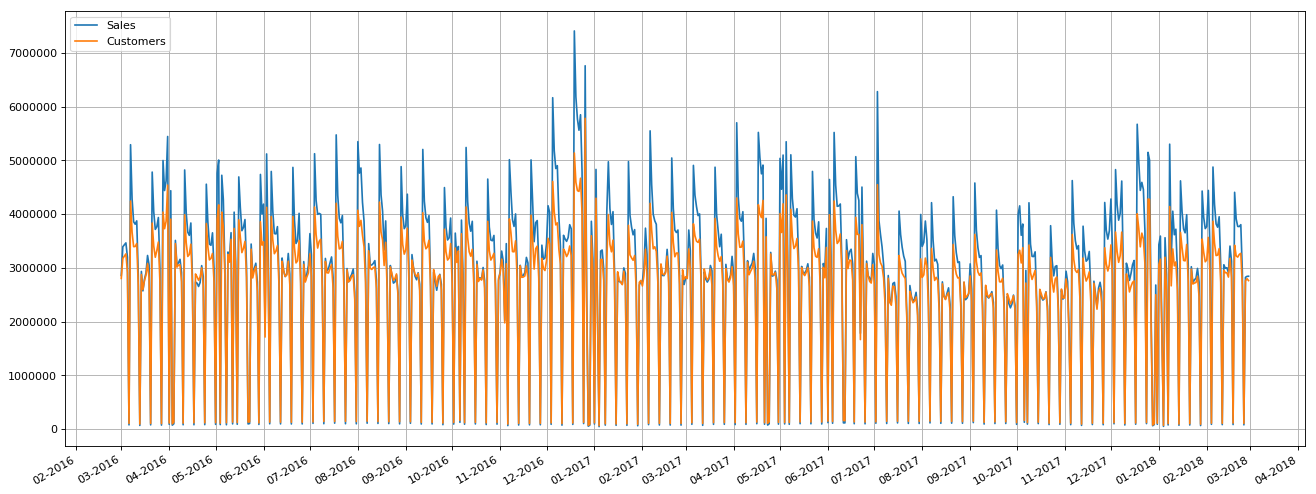

In [22]:
fig, ax = plt.subplots()
    
# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
    
ax.plot(sumofstores.Date, sumofstores.NumberOfSales)
ax.plot(sumofstores.Date, sumofstores.NumberOfCustomers*14)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsYearFmt)
ax.xaxis.set_minor_locator(months)
ax.grid(True)
plt.legend(['Sales','Customers'], loc='upper left')

fig.autofmt_xdate()
plt.show()

The negative peaks are the days in which not all of the stores are open (e.g. sundays or holidays), to have a better curve we need to:
* normalize based on the number of open stores in that day 
* drop those days

But first, let's analyze grouping by day of week :P

In [23]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
storesbyweek = dataset.groupby('Day_of_week').agg(aggregation_dict)
storesbyweek = storesbyweek.reset_index()
storesbyweek.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)
storesbyweek.head(10)

,Day_of_week,NumberOfSales,NumberOfCustomers,StoreID
0,Friday,357049705,22966356,71330
1,Monday,414036151,25129549,71342
2,Saturday,302442578,19877868,74263
3,Sunday,9485180,904315,1651
4,Thursday,322607392,21002311,67657
5,Tuesday,372857049,23675154,74897
6,Wednesday,343615601,22076906,72786


In order to compare the number of customers in different days, we need to scale them and make as if the same amount of stores were opened in each day, thus we could need to compute the Sales per store

In [24]:
storesbyweek['Sales_per_store']=storesbyweek['NumberOfSales']/storesbyweek['StoreID']

Ordering stores by day of week in order to display in a better way

In [25]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = storesbyweek['Day_of_week'].map(mapping)

storesbyweek = storesbyweek.iloc[key.argsort()].set_index('Day_of_week')

storesbyweek = storesbyweek.reset_index()
storesbyweek

,Day_of_week,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,Monday,414036151,25129549,71342,5803.540004
1,Tuesday,372857049,23675154,74897,4978.264136
2,Wednesday,343615601,22076906,72786,4720.902385
3,Thursday,322607392,21002311,67657,4768.278109
4,Friday,357049705,22966356,71330,5005.603603
5,Saturday,302442578,19877868,74263,4072.587668
6,Sunday,9485180,904315,1651,5745.112053


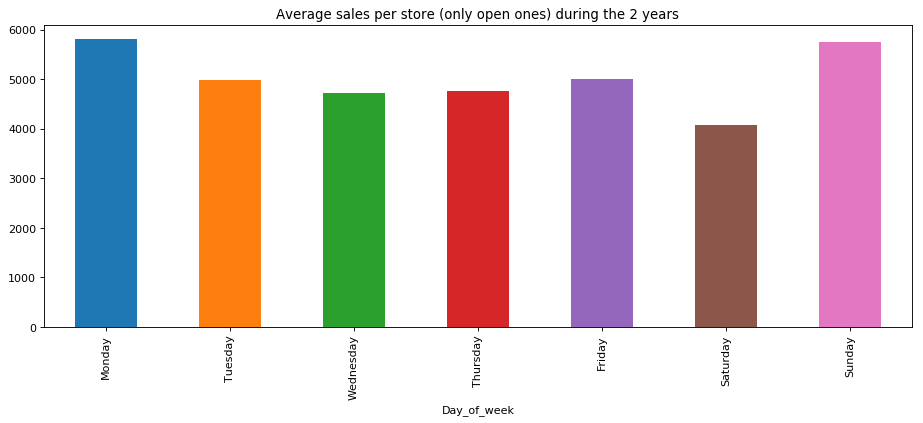

In [26]:
storesbyweek.plot('Day_of_week','Sales_per_store',figsize = (14,5),legend = 
                  False,title = 'Average sales per store (only open ones) during the 2 years',kind='bar')
#data.plot('type', 'sale', kind='bar')

### dataset saved as preprocessed_train

In [27]:
#dataset.to_csv('./dataset/preprocessed_train.csv', index=False)

## Aggregation by month

I don't know why but it does not see Date as a datetime objec even after having saved it to csv like this, I need to reencode it

In [28]:
#dataset['Month'] = dataset['Date'].dt.month
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

In [29]:
dataset['Month'] = dataset['Date'].dt.month

In [30]:
print(dataset.Month.unique())

[ 3  4  5  6  7  8  9 10 11 12  1  2]


In [31]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
storebymonth = dataset.groupby('Month').agg(aggregation_dict)
storebymonth = storebymonth.reset_index()
storebymonth.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)

Same normalization I did on week has to be applied here

In [32]:
storebymonth['Sales_per_store']=storebymonth['NumberOfSales']/storebymonth['StoreID']
storebymonth.head(12)

,Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,176731046,11172148,37460,4717.860278
1,2,169546595,10791109,35948,4716.440275
2,3,188999353,12178966,39622,4770.060901
3,4,167804971,10946607,35342,4748.032681
4,5,185148347,11823464,36880,5020.291405
5,6,178173735,11435787,36690,4856.193377
6,7,171166550,11016160,36033,4750.271973
7,8,179237571,11549812,37021,4841.510791
8,9,163203850,10792781,35713,4569.872315
9,10,162654224,10629909,34560,4706.430093


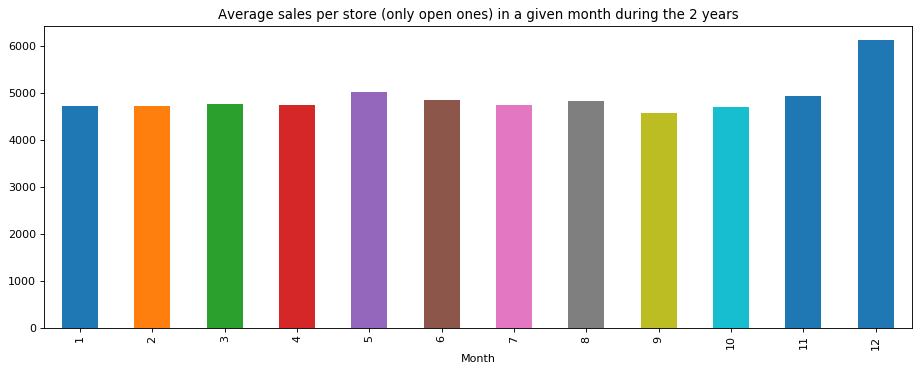

In [33]:
storebymonth.plot('Month','Sales_per_store',figsize = (14,5),legend = 
                  False,title = 'Average sales per store (only open ones) in a given month during the 2 years',kind='bar')
#data.plot('type', 'sale', kind='bar')

## Aggregation by day of month

In [34]:
dataset['Day_of_month'] = dataset['Date'].dt.day

In [35]:
print(dataset.Day_of_month.unique())

[ 1  2  4  5  7  8  9 10 11 12 14 15 16 17 18 19 21 22 23 24 25 26 28 29
 30 31  6 13 20 27  3]


In [36]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
storebyday = dataset.groupby('Day_of_month').agg(aggregation_dict)
storebyday = storebyday.reset_index()
storebyday.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)

Same normalization I did on week has to be applied here

In [37]:
storebyday['Sales_per_store']=storebyday['NumberOfSales']/storebyday['StoreID']
storebyday.head(31)

,Day_of_month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,66605230,4211085,13656,4877.360135
1,2,78742870,4899980,14587,5398.153836
2,3,75060695,4542878,13523,5550.594912
3,4,55093112,3411223,9992,5513.722178
4,5,80413933,4955205,14372,5595.180420
5,6,75474507,4601792,13776,5478.695340
6,7,81488284,5009598,14991,5435.813755
7,8,80578521,4971019,15119,5329.619750
8,9,74025241,4680963,14707,5033.333855
9,10,72302168,4589380,14522,4978.802369


## Applying normalization to make use of the day of the month
Then when we're able to test the regression, we could test whether it is better to use only one attribute (normalized score for the day of the month like here) or just use the plain sales_per_store non-normalized, or maybe introduce 31 attributes

In [38]:
rang=storebyday.Sales_per_store.max()-storebyday.Sales_per_store.min()
storebyday['Sales_per_store']=storebyday['Sales_per_store']-storebyday.Sales_per_store.min()



In [39]:
storebyday['Sales_per_store']=storebyday['Sales_per_store']/rang
storebyday.head(31)

,Day_of_month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,66605230,4211085,13656,0.501337
1,2,78742870,4899980,14587,0.863127
2,3,75060695,4542878,13523,0.969027
3,4,55093112,3411223,9992,0.943412
4,5,80413933,4955205,14372,1.000000
5,6,75474507,4601792,13776,0.919079
6,7,81488284,5009598,14991,0.889289
7,8,80578521,4971019,15119,0.815517
8,9,74025241,4680963,14707,0.609690
9,10,72302168,4589380,14522,0.571808


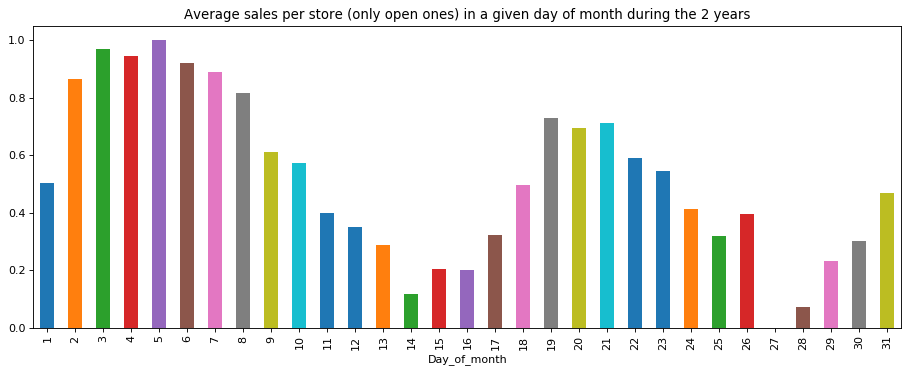

In [40]:
storebyday.plot('Day_of_month','Sales_per_store',figsize = (14,5),legend = 
                  False,title = 'Average sales per store (only open ones) in a given day of month during the 2 years',kind='bar')
#data.plot('type', 'sale', kind='bar')

## Important: Extract average sales of the week (monday-sunday), it's the main seasonality pattern!